# Report, Mukhammadrizo Maribjonov

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
ATMAX = 2
ANMAX = 3
VMAX = 1.5
XMIN = 0
XMAX = 4

When you're driving with constant speed, even when turning, your tangential acceleration remains constant because your speed isn't changing. However, your normal acceleration increases while turning. Here's why:

Tangential Acceleration: This component of acceleration is parallel to the velocity vector. Since you're maintaining a constant speed, there's no change in the magnitude of your velocity vector along the direction of motion. Hence, tangential acceleration remains constant.

Normal Acceleration: This component of acceleration is perpendicular to the velocity vector, pointing towards the center of curvature of your path. When you're turning, your direction of motion is changing continuously, even if your speed remains constant. This change in direction requires a force towards the center of curvature, resulting in an increase in normal acceleration. The tighter the turn, the greater the change in direction and thus the greater the normal acceleration required.

In summary, while driving with constant speed, the acceleration that increases when turning is the normal acceleration. This increase is necessary to continuously change the direction of your velocity vector as you navigate the curve.

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

**Tangential Component**: This component is responsible for changes in speed. It accounts for the tangential acceleration.

**Normal Component**: This component is responsible for changes in direction. It accounts for the normal acceleration.

In fact at any point on the path we are only limited by $a_n$ and $v$ notice that $a_n ∼ v^2$, while $a_{\tau}$ shows how fast we can change $v$.

$a_n = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

From this we can derive 2 constraints for $v$:
$
\begin{cases}
a_n \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
= min(v_{max}, \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|}
$$

* $y(x) = 3xln(\frac{x}{5})$
* $\dot y(x) = 3ln(x) - 3ln(5) + 3$
* $\ddot y(x) = \frac{3}{x}$

This way I tried too many time. But failed in one place. I build $v(t)$ which follows the $a_n$ constraint. But I could not build $v(t)$ which followed $a_t$ constaint. I tried too much time. Almost I spend 90% of my time for that method. But they I gave up. I make my $V_{MAX} = 1.5$, and all problems solved. I moved with max speed I much as I can, then I sloved down at some point to keep $a_n$ limit. That's all. Becuase of small $V_{MAX}$, I could forget about $a_t$.

In [2]:
def fun(x):
    return 3*x*np.log(x/5)

def dfun(x):
    return 3*np.log(x) - 3 * np.log(5) + 3

def ddfun(x):
    return 3/x

def r(x):
    return ((1 + dfun(x) ** 2) ** 1.5) / abs(ddfun(x))

def vmax(x):
    return min(VMAX, np.sqrt(ANMAX * r(x)))


l = 9.8
vinit = 0

I strt moving from rest position ($v = 0$). Find time which takes point to reach $V_{MAX}$.

In [3]:
x0 = 1e-9
dx = 1e-6
l = 0
v = 0
time = 0
at = ATMAX
yplot = []
xplot = []
timeplot = []
velplot = []
acctplot = []
accnplot = []

#acceleration:
while v < vmax(x0):
    yplot += [fun(x0)]
    xplot += [x0]
    timeplot += [time]
    velplot += [v]
    accnplot += [v*v / r(x0)]
    dy = fun(x0 + dx) - fun(x0)
    ds = (dx **2 + dy ** 2) ** 0.5
    vf = (2 * ATMAX * ds + v**2)**0.5
    x0 += dx
    time += (vf - v)/at
    v = vf
    acctplot += [at]
    l += ds

print(time, v)

0.7500014258934545 1.500002851786909


I reaches $V_{MAX} = 1.5$ at $t = 0.754$

Now, we need to find time $t$ when point should start to decellerate, so that I stops right before the cliff.

In [4]:
#Finding Time for deceleration:
x1 = 4
v1 = 0
while v1 < vmax(x1):
    dy = fun(x1 - dx) - fun(x1)
    ds = (dx **2 + dy ** 2) ** 0.5
    vf = (2 * ATMAX * ds + v1**2)**0.5
    x1 -= dx
    v1 = vf

Compute accelerations and velocities for the middle part of the trajectory.

1. $\textbf{Position Along the Trajectory:}$
   - $ y = f(x) $ where $ f(x) $ is the given function.
   - At each step, the code computes $ y $ using $ f(x) $ and stores the coordinates $(x, y)$.

2. $\textbf{Time and Velocity Calculation:}$
   - The time ($ \Delta t $) taken to move from one point to another is calculated based on the velocity $ v $ and the distance $ ds $.
     $\Delta t = \frac{ds}{v}$
   - Velocity ($ v $) is updated based on the constraints of tangential acceleration $ a_t $ and normal acceleration $ a_n $.

3. $\textbf{Acceleration Computation:}$
   - Tangential acceleration ($ a_t $) is derived from the change in velocity over the incremental distance traveled $ ds $.
     $a_t = \frac{{v_f^2 - v^2}}{{2 \cdot ds}}$
   - Normal acceleration ($ a_n $) is calculated based on the difference between the maximum velocity function $ v_{\text{max}}(x) $ and the current velocity $ v $.
     $a_n = \frac{{v^2}}{{r(x)}}$

4. $\textbf{Update Position and Velocity:}$
   - After computing the acceleration, the position ($ x $) and velocity ($ v $) of the point are updated.
   - Total distance traveled ($ l $) is incremented.

5. $\textbf{Time Calculation:}$
   - If the acceleration is zero, time ($ \Delta t $) is calculated based on the distance traveled ($ ds $) and the current velocity ($ v $).
   - Otherwise, time is determined by the change in velocity over the distance traveled.


In [6]:
while x0 < x1:
    yplot += [fun(x0)]
    xplot += [x0]
    timeplot += [time]
    velplot += [v]
    accnplot += [v*v / r(x0)]
    dy = fun(x0 + dx) - fun(x0)
    ds = (dx**2 + dy**2) ** 0.5

    # dv based on limits of a_t
    dvpotential = (2 * ATMAX * ds + v**2)**0.5 - v

    #dv based on limits of a_n
    dv = vmax(x0 + dx) - v
    
    vf = 0
    if dv < 0:
        vf = v + dv
    else:
        vf = min(dvpotential,dv) + v
    a = abs(vf**2 - v**2) / (2 * ds)
    acctplot += [(vf**2 - v**2) / (2 * ds)]
    #print(a, " ", ds, " ", vf, " ", v)
    if a == 0:
        time += ds / v
    else :
        time += abs((vf - v)) / a
    
    v = vf
    l += ds
    x0 += dx

In [7]:
# This code block just computes plot values for deceleration part
while x0 < 4:
    yplot += [fun(x0)]
    xplot += [x0]
    timeplot += [time]
    velplot += [v]
    accnplot += [v*v / r(x0)]

    dy = fun(x0 - dx) - fun(x0)
    ds = (dx **2 + dy ** 2) ** 0.5
    vf = (2 * ATMAX * ds + v**2)**0.5
    x0 += dx
    time += (vf - v)/at
    v -= vf - v
    acctplot += [-at]
    l += ds


In [8]:
velplot[-1]
len(velplot[0::1000])

4000

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML, display


# Create animation
fig, ax = plt.subplots()

# Lists to store simulation data
x_list = xplot[0::1000]
y_list = yplot[0::1000]
v_list = velplot[0::1000]
a_t_list = acctplot[0::1000]
a_n_list = accnplot[0::1000]

# Simulation loop
total_time = 0  # Variable to track the total simulation time


def update(timestep, x_list, y_list, v_list, a_t_list, a_n_list):
    ax.clear()
    ax.plot(x_list, y_list, 'b--', label='Traj.')
    
    # Ensure timestep is within bounds
    if timestep < len(x_list):
        
        ax.plot(x_list[timestep], y_list[timestep], 'ro')
        
        ax.quiver(x_list[timestep], y_list[timestep], v_list[timestep]*np.cos(np.arctan(dfun(x_list[timestep]))), v_list[timestep]*np.sin(np.arctan(dfun(x_list[timestep]))), color='r', label='Vel', scale=6)
        
        ax.quiver(x_list[timestep], y_list[timestep], a_t_list[timestep]*np.cos(np.arctan(dfun(x_list[timestep]))), a_t_list[timestep]*np.sin(np.arctan(dfun(x_list[timestep]))), color='g', label='Acc_t', scale=6)
        
        ax.quiver(x_list[timestep], y_list[timestep], -a_n_list[timestep]*np.sin(np.arctan(dfun(x_list[timestep]))), a_n_list[timestep]*np.cos(np.arctan(dfun(x_list[timestep]))), color='y', label='Acc_n', scale=10)
        
        # ax.quiver(x_list[timestep], y_list[timestep], -(x_list[timestep] + a_n_list[timestep]*np.sin(np.arctan(dfun(x_list[timestep])))), -(y_list[timestep] + a_n_list[timestep]*np.cos(np.arctan(dfun(x_list[timestep])))), color='y', label='Acc_n', scale=10)

    
    
    ax.legend()
    ax.set_xlim(-1, 6)
    ax.set_ylim(-6, 1)
    plt.gca().set_aspect(aspect='equal', adjustable='box')
    plt.grid(True)


ani = animation.FuncAnimation(fig, update, frames=int(len(timeplot[0::1000])), fargs=(x_list, y_list, v_list, a_t_list, a_n_list), interval=10)
display(HTML(ani.to_jshtml()))
# ani.save("simulation2.gif")
# plt.show()
plt.close(fig)

## Answers

Curve length is:  9.803165894618019
Time needed is:  7.306612364279535


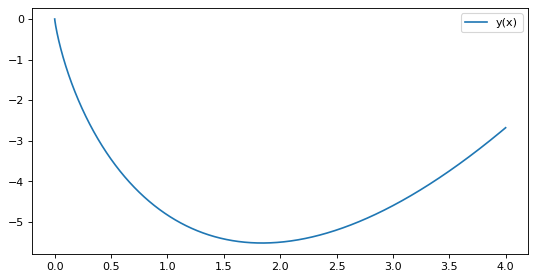

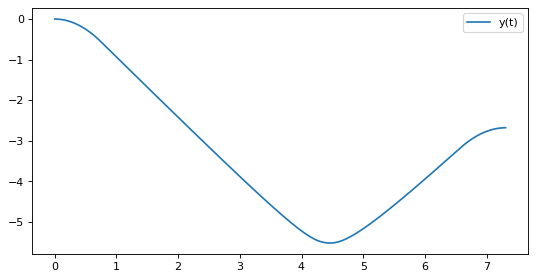

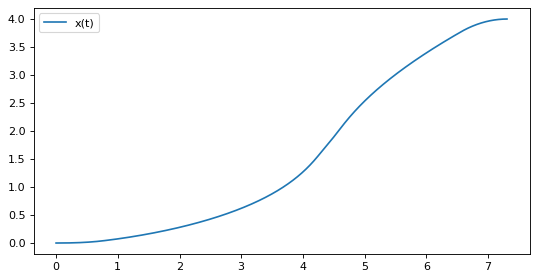

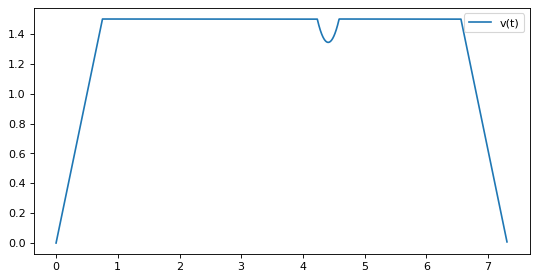

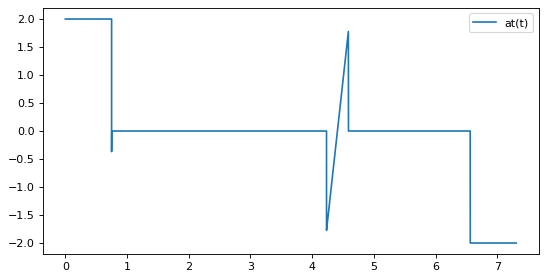

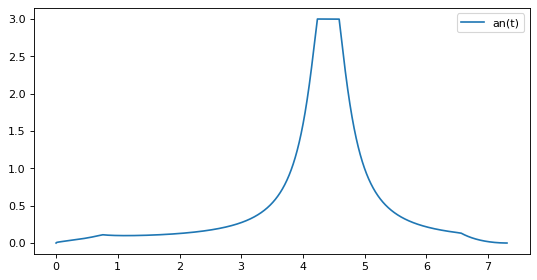

In [9]:
figure(figsize=(8, 4), dpi=80)
plt.plot(xplot,yplot,label = "y(x)")
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(timeplot,yplot,label = "y(t)")
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(timeplot,xplot,label = 'x(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(timeplot,velplot,label = 'v(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(timeplot,acctplot,label = 'at(t)')
plt.legend()
figure(figsize=(8, 4), dpi=80)
plt.plot(timeplot,accnplot,label = 'an(t)')
plt.legend()
print("Curve length is: ", l)
print("Time needed is: ", time)

1. time = 7.3 sec
2. Open sim_vid.webm to see simulation or simulation2.gif. If you want to run code for simulation it will take around 10 mins.
3. plots are show above